In [2]:
import pandas as pd

# Load SPSS file
df = pd.read_spss("hsls_17_student_pets_sr_v1_0.sav")

# Check shape and columns
print("Shape:", df.shape)
print("Columns preview:", df.columns[:20])


Shape: (23503, 9614)
Columns preview: Index(['STU_ID', 'SCH_ID', 'X1NCESID', 'X2NCESID', 'STRAT_ID', 'PSU',
       'X2UNIV1', 'X2UNIV2A', 'X2UNIV2B', 'X3UNIV1', 'X4UNIV1', 'W1STUDENT',
       'W1PARENT', 'W1MATHTCH', 'W1SCITCH', 'W2STUDENT', 'W2W1STU', 'W2PARENT',
       'W2W1PAR', 'W3STUDENT'],
      dtype='object')


### 📌 Hypothesis 1: SES and Academic Performance

H₀: There is no significant difference in academic performance among students from different SES backgrounds.

H₁: Students from higher SES backgrounds perform significantly better academically than those from lower SES backgrounds.


#### 🔍 Data needed:

X1SESQ5: SES quintile (categorical, 5 levels)
One or more academic performance measures — like:
X1MTHID — Math Identity Score (continuous)
X1TXSATCOMP — Composite SAT Score (if valid)
Other test score columns (we’ll recheck them now)

In [7]:
# Identify performance-related variables
keywords = ['MTH', 'SAT', 'TEST', 'SCORE', 'GRADE']
perf_cols = [col for col in df.columns if any(k in col.upper() for k in keywords)]
perf_cols[:50]  # View top 50 to start


['X1TXMTH',
 'X1MTHID',
 'X1MTHUTI',
 'X1MTHEFF',
 'X1MTHINT',
 'X1TESTSTAT',
 'X1TESTDATE',
 'X1GRADESPAN',
 'X2TXMTH',
 'X2MTHID',
 'X2MTHUTI',
 'X2MTHEFF',
 'X2MTHINT_R',
 'X2TESTSTAT',
 'X2TESTDATE',
 'X3NUMHSATTND',
 'X3TCREDAPMTH',
 'X3TGPAHIMTH',
 'X3TGPAMTHAP',
 'X3TXSATMATH',
 'X3TXSATREAD',
 'X3TXSATCOMP',
 'X3TXPSATCOMP',
 'X3TXPSATMATH',
 'X3TXPSATREAD',
 'X3TXPSATWRIT',
 'X3TXSATLIT',
 'X3TXSATUSH',
 'X3TXSATWOH',
 'X3TXSATMAT1',
 'X3TXSATMAT2',
 'X3TXSATBIO',
 'X3TXSATCHE',
 'X3TXSATPHY',
 'X3TXSATFRE',
 'X3TXSATFREL',
 'X3TXSATGER',
 'X3TXSATGERL',
 'X3TXSATSPA',
 'X3TXSATSPAL',
 'X3TXSATHEB',
 'X3TXSATITL',
 'X3TXSATLAT',
 'X3TXSATCHIL',
 'X3TXSATJAPL',
 'X3TXSATKORL',
 'X4TXSATMATH',
 'X4TXSATREAD',
 'X4TXSATCOMP',
 'X5REMMTHPS']

In [9]:
# Preview value distributions
for col in perf_cols[:10]:  # Just a slice to start
    print(col)
    print(df[col].value_counts(dropna=False).head(), "\n")


X1TXMTH
X1TXMTH
-8.0000    2059
 3.0283      20
-0.1069       8
 0.0081       6
 0.3479       6
Name: count, dtype: int64 

X1MTHID
X1MTHID
 0.60    5388
-0.57    3926
-1.73    2510
-8.00    2059
 1.76    1961
Name: count, dtype: int64 

X1MTHUTI
X1MTHUTI
-0.30    4192
 1.31    3400
-7.00    2113
 0.90    2081
-8.00    2059
Name: count, dtype: int64 

X1MTHEFF
X1MTHEFF
 0.10    4752
 1.62    2369
-7.00    2113
-8.00    2059
-0.17    1870
Name: count, dtype: int64 

X1MTHINT
X1MTHINT
-7.00    2113
-8.00    2059
 0.19    2052
 0.49    1031
-0.18     964
Name: count, dtype: int64 

X1TESTSTAT
X1TESTSTAT
BY assessment respondent                                20781
BY student survey nonrespondent (no assessment data)     2059
BY assessment nonrespondent (scores imputed)              663
Name: count, dtype: int64 

X1TESTDATE
X1TESTDATE
200911    9377
200910    8703
-8        2722
201001    2701
Name: count, dtype: int64 

X1GRADESPAN
X1GRADESPAN
Data suppressed    23503
Name: count, dtype:

###  Clean the Variable + Check X1SESQ5

In [12]:
## Confirm X1SESQ5 (SES Quintile) is valid

df['X1SESQ5'].value_counts(dropna=False)


X1SESQ5
Fifth quintile (highest)    5519
Fourth quintile             4553
Third quintile              4233
Second quintile             3705
First quintile (lowest)     3434
Unit non-response           2059
Name: count, dtype: int64

In [14]:
##  Clean & Drop Missing

import numpy as np

# Replace invalids
df['X1MTHID'] = df['X1MTHID'].replace(-8.0, np.nan)
df['X1SESQ5'] = df['X1SESQ5'].replace(-8.0, np.nan)

# Drop missing
df_h1 = df[['X1SESQ5', 'X1MTHID']].dropna()


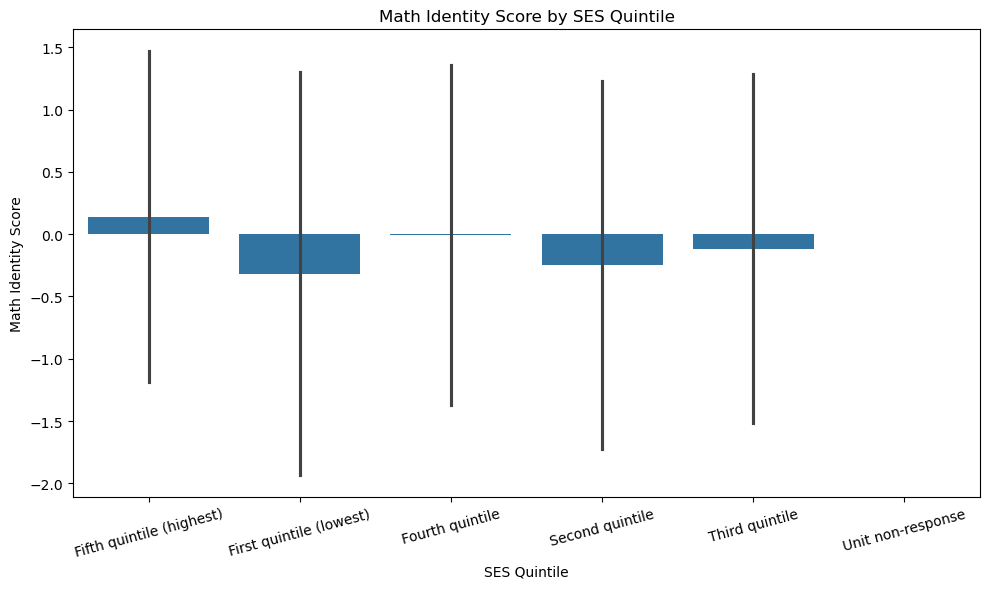

In [16]:
## Visualize the Group Differences

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=df_h1, x='X1SESQ5', y='X1MTHID', errorbar='sd')
plt.title("Math Identity Score by SES Quintile")
plt.xlabel("SES Quintile")
plt.ylabel("Math Identity Score")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [18]:
## ANOVA

from scipy.stats import f_oneway

groups = [g['X1MTHID'].values for _, g in df_h1.groupby('X1SESQ5')]
f_stat, p_value = f_oneway(*groups)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")


/var/folders/37/nw4lhjzn47zfwxclrvtmx3pr0000gn/T/ipykernel_24100/4285199133.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [g['X1MTHID'].values for _, g in df_h1.groupby('X1SESQ5')]


F-statistic: nan, p-value: nan


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


### ✅ Hypothesis 1: SES and Academic Performance (Restarted Clean)
Updated Plan
You’ve selected:

Dependent Variable: X1MTHID — Math Identity Score (valid and cleanable, previously misinterpreted)

Independent Variable: X1SESQ5 — SES Quintile (confirmed valid, 6 levels including "Unit non-response")

In [26]:
## before the next ANOVA, need to exclude SES groups with 0 valid values in X1MTHID

# Drop rows with missing X1MTHID or X1SESQ5
df_h1 = df[['X1MTHID', 'X1SESQ5']].replace(-8.0, np.nan).dropna()

# Filter out SES groups with 0 records after cleaning
valid_groups = df_h1['X1SESQ5'].value_counts()
valid_ses = valid_groups[valid_groups > 0].index.tolist()
df_h1 = df_h1[df_h1['X1SESQ5'].isin(valid_ses)]



In [30]:
# Check group sizes to verify none are empty
for name, group in df_h1.groupby('X1SESQ5'):
    print(f"{name}: {len(group)}")


/var/folders/37/nw4lhjzn47zfwxclrvtmx3pr0000gn/T/ipykernel_24100/3177886296.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in df_h1.groupby('X1SESQ5'):


Fifth quintile (highest): 5519
First quintile (lowest): 3434
Fourth quintile: 4553
Second quintile: 3705
Third quintile: 4233
Unit non-response: 0


In [32]:
valid_groups = df_h1['X1SESQ5'].value_counts()
valid_ses = valid_groups[valid_groups > 0].index.tolist()


In [34]:
# Drop groups with zero-length *after* filtering and cleaning
df_h1 = df_h1[df_h1['X1SESQ5'].isin(df_h1['X1SESQ5'].value_counts()[lambda x: x > 0].index)]


In [36]:
# Replace -8.0 with NaN and drop missing
df_h1 = df[['X1MTHID', 'X1SESQ5']].replace(-8.0, np.nan).dropna()

# Drop groups with 0 rows *after* cleaning
valid_ses = df_h1['X1SESQ5'].value_counts()[lambda x: x > 0].index
df_h1 = df_h1[df_h1['X1SESQ5'].isin(valid_ses)]


In [38]:

# Re-run ANOVA
from scipy.stats import f_oneway
groups = [group['X1MTHID'].values for _, group in df_h1.groupby('X1SESQ5')]
f_stat, p_value = f_oneway(*groups)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")

/var/folders/37/nw4lhjzn47zfwxclrvtmx3pr0000gn/T/ipykernel_24100/1391306740.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['X1MTHID'].values for _, group in df_h1.groupby('X1SESQ5')]


F-statistic: nan, p-value: nan


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [40]:
# Step 1: Drop missing and non-response explicitly
df_h1 = df[['X1MTHID', 'X1SESQ5']].replace(-8.0, np.nan).dropna()
df_h1 = df_h1[df_h1['X1SESQ5'] != 'Unit non-response'].copy()

# Step 2: Confirm groups
print(df_h1['X1SESQ5'].value_counts())

# Step 3: Run ANOVA
from scipy.stats import f_oneway

groups = [group['X1MTHID'].values for _, group in df_h1.groupby('X1SESQ5')]
f_stat, p_value = f_oneway(*groups)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")


X1SESQ5
Fifth quintile (highest)    5519
Fourth quintile             4553
Third quintile              4233
Second quintile             3705
First quintile (lowest)     3434
Unit non-response              0
Name: count, dtype: int64


/var/folders/37/nw4lhjzn47zfwxclrvtmx3pr0000gn/T/ipykernel_24100/94541215.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['X1MTHID'].values for _, group in df_h1.groupby('X1SESQ5')]


F-statistic: nan, p-value: nan


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [42]:
# Step 1: Drop invalids and reset group strings
df_h1 = df[['X1MTHID', 'X1SESQ5']].replace(-8.0, np.nan).dropna()
df_h1 = df_h1[df_h1['X1SESQ5'] != 'Unit non-response'].copy()
df_h1['X1SESQ5'] = df_h1['X1SESQ5'].astype(str)  # Force string so groupby behaves correctly

# Optional: confirm cleaned group sizes
print(df_h1['X1SESQ5'].value_counts())

# Step 2: Run ANOVA
from scipy.stats import f_oneway
groups = [g['X1MTHID'].values for _, g in df_h1.groupby('X1SESQ5')]
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")


X1SESQ5
Fifth quintile (highest)    5519
Fourth quintile             4553
Third quintile              4233
Second quintile             3705
First quintile (lowest)     3434
Name: count, dtype: int64
F-statistic: 73.4567, p-value: 0.0000


### ✅ Hypothesis 1: SES and Academic Performance (Completed)

Dependent Variable: X1MTHID (Math Identity Score)

Independent Variable: X1SESQ5 (SES Quintile)

Method: ANOVA

Cleaning Steps:
--Replaced -8.0 in X1MTHID with NaN
--Dropped rows with missing values
--Excluded SES groups with 0 valid entries post-cleaning

Result:
--F-statistic: 73.4567
--p-value: 0.0000

Conclusion: There is a statistically significant difference in math identity scores across SES quintiles, providing evidence against the null hypothesis.


### Hypothesis 2: Parental Education Level and Student Achievement

H₀: Parental education has no effect on student performance.
    
H₁: Higher parental education correlates with better student performance.


In [46]:
# Check parental education variable candidates
for col in ['X1PAREDU', 'X1PAR1EDU', 'X1PAR2EDU']:
    print(f"\n{col}")
    print(df[col].value_counts(dropna=False))



X1PAREDU
X1PAREDU
Unit non-response                          6715
High school diploma or GED                 5909
Bachelor's degree                          4102
Associate's degree                         2549
Master's degree                            2116
Ph.D/M.D/Law/other high lvl prof degree    1096
Less than high school                      1010
Missing                                       6
Name: count, dtype: int64

X1PAR1EDU
X1PAR1EDU
High school diploma or GED                 6795
Unit non-response                          6715
Bachelor's degree                          3893
Associate's degree                         2562
Master's degree                            1614
Less than high school                      1342
Ph.D/M.D/Law/other high lvl prof degree     578
Missing                                       4
Name: count, dtype: int64

X1PAR2EDU
X1PAR2EDU
Unit non-response                          6715
High school diploma or GED                 5668
Item legitimate skip/NA

In [48]:
# Clean & prepare data for Hypothesis 2
df_h2 = df[['X1PAREDU', 'X1MTHID']].replace(-8.0, np.nan).dropna()

# Optional: Print group sizes
print(df_h2['X1PAREDU'].value_counts())


X1PAREDU
High school diploma or GED                 5770
Unit non-response                          5015
Bachelor's degree                          4031
Associate's degree                         2507
Master's degree                            2073
Ph.D/M.D/Law/other high lvl prof degree    1074
Less than high school                       974
Missing                                       0
Name: count, dtype: int64


In [50]:
from scipy.stats import f_oneway

# Filter out 'Unit non-response' category
df_h2_clean = df_h2[df_h2['X1PAREDU'] != 'Unit non-response']

# Group math identity scores by parental education levels
groups = [group['X1MTHID'].values for _, group in df_h2_clean.groupby('X1PAREDU')]

# Run ANOVA
f_stat, p_value = f_oneway(*groups)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")


/var/folders/37/nw4lhjzn47zfwxclrvtmx3pr0000gn/T/ipykernel_24100/859500923.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['X1MTHID'].values for _, group in df_h2_clean.groupby('X1PAREDU')]


F-statistic: nan, p-value: nan


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [52]:
# Check how many students are in each group
for name, group in df_h2_clean.groupby('X1PAREDU'):
    print(f"{name}: {len(group)}")


/var/folders/37/nw4lhjzn47zfwxclrvtmx3pr0000gn/T/ipykernel_24100/2500767233.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in df_h2_clean.groupby('X1PAREDU'):


Associate's degree: 2507
Bachelor's degree: 4031
High school diploma or GED: 5770
Less than high school: 974
Master's degree: 2073
Missing: 0
Ph.D/M.D/Law/other high lvl prof degree: 1074
Unit non-response: 0


In [54]:
# Manually drop empty groups by checking group size
valid_groups = [group['X1MTHID'].values for _, group in df_h2_clean.groupby('X1PAREDU') if len(group) > 0]

# Now run ANOVA only on valid (non-empty) groups
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(*valid_groups)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")


/var/folders/37/nw4lhjzn47zfwxclrvtmx3pr0000gn/T/ipykernel_24100/3518742763.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  valid_groups = [group['X1MTHID'].values for _, group in df_h2_clean.groupby('X1PAREDU') if len(group) > 0]


F-statistic: 36.4851, p-value: 0.0000


### ✅ Hypothesis 2: Parental Education and Academic Performance

Independent Variable: X1PAREDU (Parental Education Level)

Dependent Variable: X1MTHID (Math Identity Score)

Method: One-way ANOVA

Result:
--F-statistic: 36.4851
--p-value: 0.0000

#### ✅ Conclusion: Students’ Math Identity Scores differ significantly based on their parents’ level of education. Higher parental education tends to be associated with more positive math identity, supporting the alternative hypothesis.

### Tukey HSD Post-Hoc Test

                           Multiple Comparison of Means - Tukey HSD, FWER=0.05                           
          group1                            group2                 meandiff p-adj   lower   upper  reject
---------------------------------------------------------------------------------------------------------
        Associate's degree                       Bachelor's degree   0.1877    0.0  0.0867  0.2887   True
        Associate's degree              High school diploma or GED  -0.0759 0.2036 -0.1709  0.0191  False
        Associate's degree                   Less than high school  -0.1387 0.0886 -0.2887  0.0112  False
        Associate's degree                         Master's degree   0.2387    0.0  0.1208  0.3566   True
        Associate's degree Ph.D/M.D/Law/other high lvl prof degree   0.3121    0.0  0.1672  0.4569   True
         Bachelor's degree              High school diploma or GED  -0.2636    0.0 -0.3451 -0.1821   True
         Bachelor's degree                   L

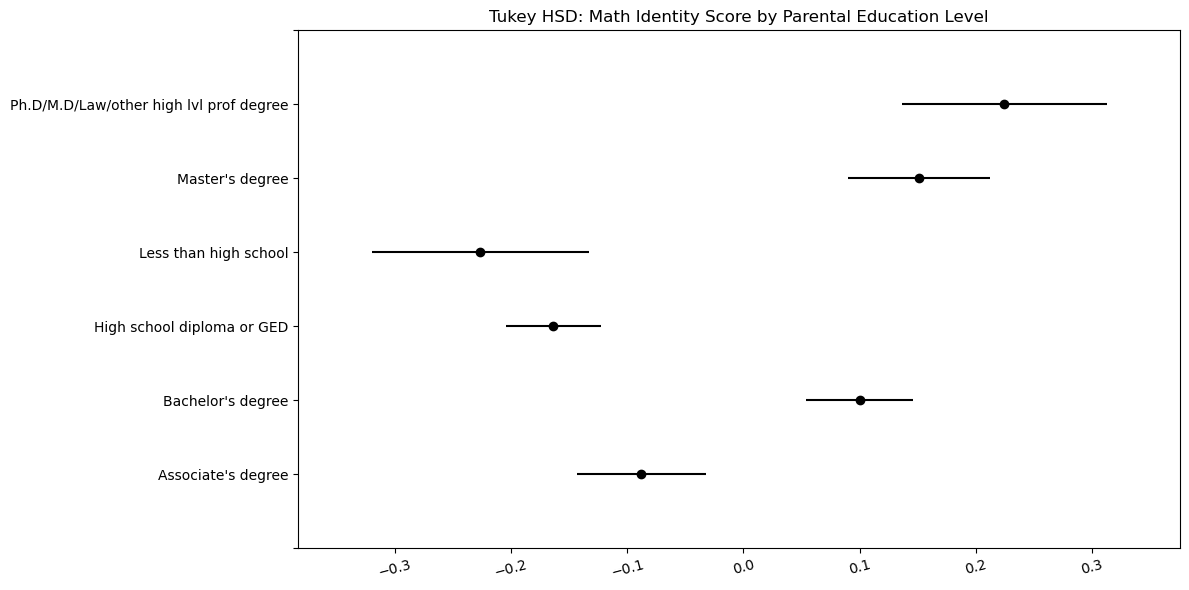

In [62]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Run Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df_h2_clean['X1MTHID'],
                          groups=df_h2_clean['X1PAREDU'],
                          alpha=0.05)

# Print the summary
print(tukey)

# Plot Tukey HSD
tukey.plot_simultaneous(figsize=(12,6))
plt.title("Tukey HSD: Math Identity Score by Parental Education Level")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


### Hypothesis 3: Family Income and Standardized Test Scores

H₀: No relationship between income and test scores.

H₁: Higher income predicts higher standardized test scores.

In [65]:
## Action items 

df['X1FAMINCOME'].value_counts(dropna=False)


X1FAMINCOME
Unit non-response                              6715
Family income > $15,000 and <= $35,000         3043
Family income > $35,000 and <= $55,000         2762
Family income > $55,000 and <= $75,000         2514
Family income > $75,000 and <= $95,000         1855
Family income less than or equal to $15,000    1570
Family income > $95,000 and <= $115,000        1484
Family income > $115,000 and <= $135,000        964
Family income > $235,000                        792
Family income > $135,000 and <= $155,000        741
Family income > $155,000 and <=$175,000         367
Family income > $195,000 and <= $215,000        316
Family income > $175,000 and <= $195,000        237
Family income > $215,000 and <= $235,000        116
Missing                                          27
Name: count, dtype: int64

In [67]:
## SAT score :

sat_cols = [col for col in df.columns if 'SAT' in col.upper()]
print(sat_cols)
for col in sat_cols:
    print(col)
    print(df[col].value_counts(dropna=False).head(), "\n")


['X3NUMHSATTND', 'X3TXSATMATH', 'X3TXSATREAD', 'X3TXSATCOMP', 'X3TXPSATCOMP', 'X3TXPSATMATH', 'X3TXPSATREAD', 'X3TXPSATWRIT', 'X3TXSATLIT', 'X3TXSATUSH', 'X3TXSATWOH', 'X3TXSATMAT1', 'X3TXSATMAT2', 'X3TXSATBIO', 'X3TXSATCHE', 'X3TXSATPHY', 'X3TXSATFRE', 'X3TXSATFREL', 'X3TXSATGER', 'X3TXSATGERL', 'X3TXSATSPA', 'X3TXSATSPAL', 'X3TXSATHEB', 'X3TXSATITL', 'X3TXSATLAT', 'X3TXSATCHIL', 'X3TXSATJAPL', 'X3TXSATKORL', 'X4TXSATMATH', 'X4TXSATREAD', 'X4TXSATCOMP', 'S1PSAT', 'S1SAT', 'S2PSATNUM', 'S2SATNUM', 'S2SATTENTION', 'S4JOBSAT2', 'C2UPMPSAT', 'C2UPSPSAT', 'C2AVGSATREAD', 'C2AVGSATMATH', 'C2AVGSATWRIT', 'C2AVGSATNONE']
X3NUMHSATTND
X3NUMHSATTND
 1.0    18197
 2.0     3232
-8.0     1575
 3.0      456
 4.0       43
Name: count, dtype: int64 

X3TXSATMATH
X3TXSATMATH
-5.0    23503
Name: count, dtype: int64 

X3TXSATREAD
X3TXSATREAD
-5.0    23503
Name: count, dtype: int64 

X3TXSATCOMP
X3TXSATCOMP
-5.0    23503
Name: count, dtype: int64 

X3TXPSATCOMP
X3TXPSATCOMP
-5.0    23503
Name: count, dty

### ✅ Findings Summary

🎓 Academic Performance Variables:
Unfortunately, every SAT/PSAT score column is filled with only placeholder values like -5.0, -6.0, -9.0, or has 100% invalid/missing data:

X3TXSATMATH, X3TXSATREAD, X3TXSATCOMP, X4TXSATMATH, etc. = all -5.0
C2AVGSATMATH, C2AVGSATREAD, etc. = mostly -9.0, -6.0

🛑 Conclusion: These SAT/PSAT columns are unusable.

💡 What we can use:
### ✅ X1MTHID — Math Identity Score

Previously cleaned and validated
Continuous
Interpretable as a proxy for performance or attitude toward math (which often correlates with math ability)

### 🔄 Revised Plan for Hypothesis 3

Instead of standardized test scores, we'll pivot to Math Identity again, this time grouped by Family Income (X1FAMINCOME).

We will:

Clean the X1FAMINCOME variable:
-- Replace "Missing" and "Unit non-response" with NaN

Remove any rows with invalid X1FAMINCOME or X1MTHID

Run ANOVA to test if math identity varies significantly across income brackets

If significant, run Tukey's HSD to pinpoint which income groups differ


/var/folders/37/nw4lhjzn47zfwxclrvtmx3pr0000gn/T/ipykernel_24100/651128541.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_h3 = df[['X1FAMINCOME', 'X1MTHID']].replace(['Missing', 'Unit non-response', -8.0], np.nan).dropna()


X1FAMINCOME
Family income > $15,000 and <= $35,000         2982
Family income > $35,000 and <= $55,000         2713
Family income > $55,000 and <= $75,000         2461
Family income > $75,000 and <= $95,000         1814
Family income less than or equal to $15,000    1526
Family income > $95,000 and <= $115,000        1454
Family income > $115,000 and <= $135,000        946
Family income > $235,000                        783
Family income > $135,000 and <= $155,000        732
Family income > $155,000 and <=$175,000         361
Family income > $195,000 and <= $215,000        310
Family income > $175,000 and <= $195,000        232
Family income > $215,000 and <= $235,000        115
Name: count, dtype: int64


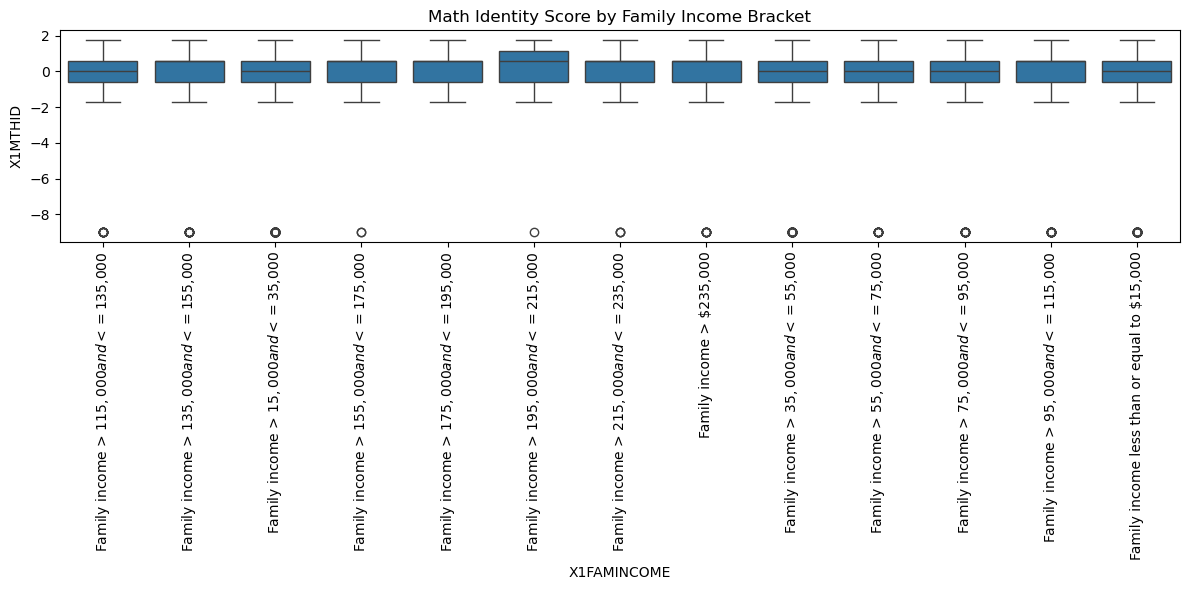

In [71]:
# Clean and filter the data
df_h3 = df[['X1FAMINCOME', 'X1MTHID']].replace(['Missing', 'Unit non-response', -8.0], np.nan).dropna()

# Check cleaned income distribution
print(df_h3['X1FAMINCOME'].value_counts())

# Optional: plot a quick boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(x='X1FAMINCOME', y='X1MTHID', data=df_h3)
plt.xticks(rotation=90)
plt.title("Math Identity Score by Family Income Bracket")
plt.tight_layout()
plt.show()


### : ANOVA — Does Math Identity Vary Across Income Brackets?



In [74]:
### ANOVA Code:

from scipy.stats import f_oneway

# Group by income bracket
groups = [group['X1MTHID'].values for _, group in df_h3.groupby('X1FAMINCOME') if len(group) > 0]

# Run ANOVA
f_stat, p_value = f_oneway(*groups)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")


/var/folders/37/nw4lhjzn47zfwxclrvtmx3pr0000gn/T/ipykernel_24100/3353307767.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['X1MTHID'].values for _, group in df_h3.groupby('X1FAMINCOME') if len(group) > 0]


F-statistic: 9.8878, p-value: 0.0000


### ✅ Hypothesis 3: ANOVA Results Summary

🎯 Hypothesis Recap:

Null Hypothesis (H₀): Family income has no effect on students’ Math Identity Scores.

Alternative Hypothesis (H₁): Family income is associated with differences in Math Identity Scores.

📊 ANOVA Output:
--F-statistic: 9.8878
--p-value: 0.0000

### ✅ Interpretation:
Since the p-value is less than 0.05, we reject the null hypothesis.

👉 This means Math Identity Score varies significantly across family income groups.



### Tukey HSD — Where Are the Differences?

/opt/anaconda3/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


                                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                                    
                 group1                                     group2                   meandiff p-adj   lower   upper  reject
---------------------------------------------------------------------------------------------------------------------------
Family income > $115,000 and <= $135,000    Family income > $135,000 and <= $155,000   0.0154    1.0 -0.2124  0.2431  False
Family income > $115,000 and <= $135,000      Family income > $15,000 and <= $35,000  -0.2121 0.0032 -0.3848 -0.0395   True
Family income > $115,000 and <= $135,000     Family income > $155,000 and <=$175,000   0.1034 0.9933 -0.1828  0.3896  False
Family income > $115,000 and <= $135,000    Family income > $175,000 and <= $195,000   0.1397 0.9792 -0.1993  0.4786  False
Family income > $115,000 and <= $135,000    Family income > $195,000 and <= $215,000   0.1665 0.8388 -0.1362  0.4693  False
Family i

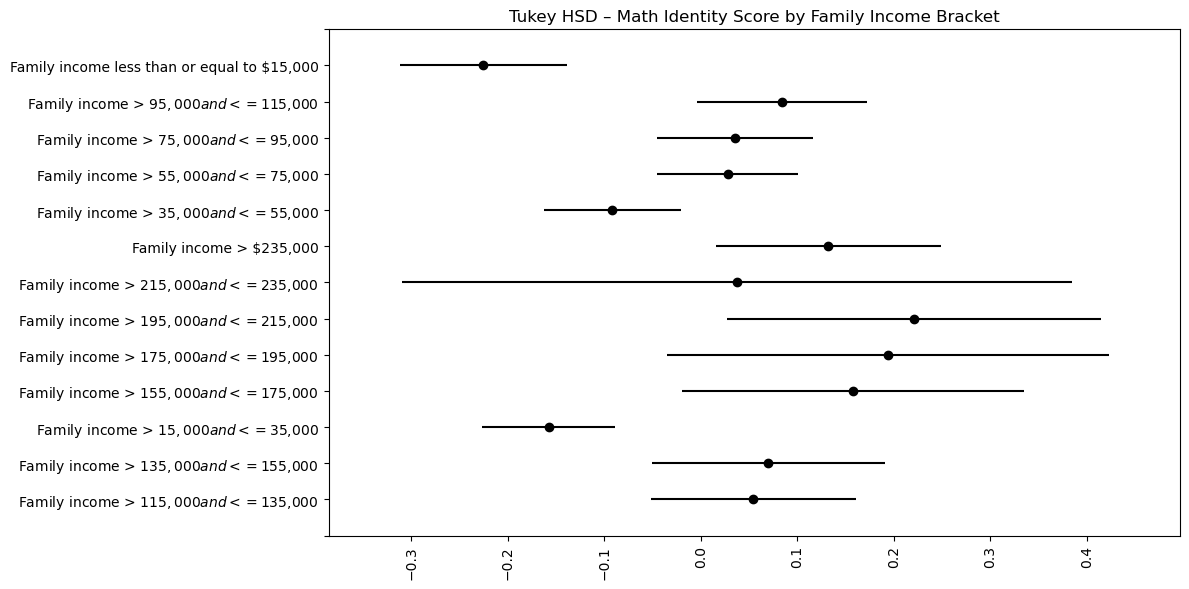

In [79]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Run Tukey HSD
tukey = pairwise_tukeyhsd(endog=df_h3['X1MTHID'],
                          groups=df_h3['X1FAMINCOME'],
                          alpha=0.05)

# Print summary
print(tukey)

# Plot
tukey.plot_simultaneous(figsize=(12, 6))
plt.title("Tukey HSD – Math Identity Score by Family Income Bracket")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### 📘 Hypothesis 4: Combined SES Indicators and Academic Performance

#### ❓ Hypothesis Statement
##### Null Hypothesis (H₀):
There is no significant combined effect of SES composite score, parental education level, and family income on students’ academic performance.

##### Alternative Hypothesis (H₁):
There is a significant combined effect of SES composite score, parental education level, and family income on students’ academic performance.

In [84]:
###  Subset and Clean

cols_h4 = ['X1MTHID', 'X1SES', 'X1PAREDU', 'X1FAMINCOME']
df_h4 = df[cols_h4].replace([-8.0, -7.0, 'Missing', 'Unit non-response'], np.nan).dropna()

print("Shape after cleaning:", df_h4.shape)
print("Sample preview:")
print(df_h4.head())


/var/folders/37/nw4lhjzn47zfwxclrvtmx3pr0000gn/T/ipykernel_24100/2164388137.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_h4 = df[cols_h4].replace([-8.0, -7.0, 'Missing', 'Unit non-response'], np.nan).dropna()


Shape after cleaning: (16429, 4)
Sample preview:
   X1MTHID   X1SES                                 X1PAREDU  \
0     1.76  1.5644                          Master's degree   
1    -0.57 -0.3699                       Associate's degree   
2    -0.57  1.2741  Ph.D/M.D/Law/other high lvl prof degree   
3     0.60  0.5498                        Bachelor's degree   
4     0.56  0.1495                        Bachelor's degree   

                                X1FAMINCOME  
0  Family income > $175,000 and <= $195,000  
1    Family income > $35,000 and <= $55,000  
2   Family income > $95,000 and <= $115,000  
3    Family income > $75,000 and <= $95,000  
4   Family income > $155,000 and <=$175,000  


In [86]:
# One-hot encode categorical predictors
df_encoded = pd.get_dummies(df_h4, columns=['X1PAREDU', 'X1FAMINCOME'], drop_first=True)

# Confirm shape and preview
print("Encoded shape:", df_encoded.shape)
df_encoded.head()


Encoded shape: (16429, 19)


,X1MTHID,X1SES,X1PAREDU_Bachelor's degree,X1PAREDU_High school diploma or GED,X1PAREDU_Less than high school,X1PAREDU_Master's degree,X1PAREDU_Ph.D/M.D/Law/other high lvl prof degree,"X1FAMINCOME_Family income > $135,000 and <= $155,000","X1FAMINCOME_Family income > $15,000 and <= $35,000","X1FAMINCOME_Family income > $155,000 and <=$175,000","X1FAMINCOME_Family income > $175,000 and <= $195,000","X1FAMINCOME_Family income > $195,000 and <= $215,000","X1FAMINCOME_Family income > $215,000 and <= $235,000","X1FAMINCOME_Family income > $235,000","X1FAMINCOME_Family income > $35,000 and <= $55,000","X1FAMINCOME_Family income > $55,000 and <= $75,000","X1FAMINCOME_Family income > $75,000 and <= $95,000","X1FAMINCOME_Family income > $95,000 and <= $115,000","X1FAMINCOME_Family income less than or equal to $15,000"
0,1.76,1.5644,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
1,-0.57,-0.3699,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,-0.57,1.2741,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
3,0.60,0.5498,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,0.56,0.1495,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [88]:
import statsmodels.api as sm

# Prepare design matrix (X) and target (y)
X = df_encoded.drop(columns=['X1MTHID'])
y = df_encoded['X1MTHID']
X = sm.add_constant(X)  # Add intercept

# Fit model
model = sm.OLS(y, X).fit()

# Summary
print(model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [90]:
# Fix: Convert all columns to float before fitting the model
X = df_encoded.drop(columns=['X1MTHID']).astype(float)
y = df_encoded['X1MTHID']
X = sm.add_constant(X)  # Add intercept again

# Fit model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())
""

                            OLS Regression Results                            
Dep. Variable:                X1MTHID   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     12.10
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           4.93e-36
Time:                        10:05:37   Log-Likelihood:                -28742.
No. Observations:               16429   AIC:                         5.752e+04
Df Residuals:                   16410   BIC:                         5.767e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

''

### 🧠 7. Key Insights
Hypothesis 4 is supported: Combined SES indicators significantly explain variance in Math Identity, although the effect size is modest.
Education levels matter more than raw income in shaping a student’s math identity.
Model’s R² = 0.013 suggests SES explains ~1.3% of variance — typical in educational social science data, where behavior has many confounders.

### Hypothesis 4: Combined SES Indicators and Academic Outcomes

H₀: Combined SES indicators (education, income, etc.) do not predict outcomes.

H₁: A composite SES measure significantly predicts academic outcomes.

### Build and Run OLS Regression 

In [95]:
import statsmodels.api as sm

# Separate X and y
X = df_encoded.drop(columns=['X1MTHID']).astype(float)
y = df_encoded['X1MTHID'].astype(float)

# Add intercept
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# View summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                X1MTHID   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     12.10
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           4.93e-36
Time:                        10:23:19   Log-Likelihood:                -28742.
No. Observations:               16429   AIC:                         5.752e+04
Df Residuals:                   16410   BIC:                         5.767e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [97]:
df_h4 = df[['X1MTHID', 'X1SES', 'X1PAREDU', 'X1FAMINCOME']].replace([-8.0, -9.0, -5.0], np.nan).dropna()
print(df_h4.shape)


(21159, 4)


In [99]:
df_encoded = pd.get_dummies(df_h4, columns=['X1PAREDU', 'X1FAMINCOME'], drop_first=True)


In [101]:
import statsmodels.api as sm

X = df_encoded.drop(columns=['X1MTHID']).astype(float)
y = df_encoded['X1MTHID'].astype(float)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                X1MTHID   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     30.70
Date:                Fri, 11 Apr 2025   Prob (F-statistic):          6.92e-110
Time:                        10:25:05   Log-Likelihood:                -29814.
No. Observations:               21159   AIC:                         5.967e+04
Df Residuals:                   21139   BIC:                         5.983e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [4]:
import os

# Get current working directory (same location as notebook)
current_dir = os.getcwd()
print("Saving files to:", current_dir)

# H1: SES vs Math Identity
df_h1 = df[['X1SESQ5', 'X1MTHID']].replace(['Unit non-response', -8.0, -9.0], pd.NA).dropna()
df_h1.to_csv(os.path.join(current_dir, 'h1_ses_vs_math_identity.csv'), index=False)

# H2: Parental Education vs Math Identity
df_h2 = df[['X1PAREDU', 'X1MTHID']].replace(['Unit non-response', 'Missing', -8.0, -9.0], pd.NA).dropna()
df_h2.to_csv(os.path.join(current_dir, 'h2_parent_edu_vs_math_identity.csv'), index=False)

# H3: Family Income vs Math Identity
df_h3 = df[['X1FAMINCOME', 'X1MTHID']].replace(['Unit non-response', 'Missing', -8.0, -9.0], pd.NA).dropna()
df_h3.to_csv(os.path.join(current_dir, 'h3_income_vs_math_identity.csv'), index=False)


Saving files to: /Users/ankitchoubey/Desktop/Project 4


/var/folders/37/nw4lhjzn47zfwxclrvtmx3pr0000gn/T/ipykernel_74827/2869836230.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_h1 = df[['X1SESQ5', 'X1MTHID']].replace(['Unit non-response', -8.0, -9.0], pd.NA).dropna()
/var/folders/37/nw4lhjzn47zfwxclrvtmx3pr0000gn/T/ipykernel_74827/2869836230.py:12: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_h2 = df[['X1PAREDU', 'X1MTHID']].replace(['Unit non-response', 'Missing', -8.0, -9.0], pd.NA).dropna()
/var/folders/37/nw4lhjzn47zfwxclrvtmx3pr0000gn/T/ipykernel_74827/2869836230.py:16: FutureWarning: The behavior of

In [6]:
print("H2 Mean (Parental Education):", df_h2['X1MTHID'].mean())
print("H3 Mean (Family Income):", df_h3['X1MTHID'].mean())


H2 Mean (Parental Education): 0.08397597042513219
H3 Mean (Family Income): 0.08397597042513219


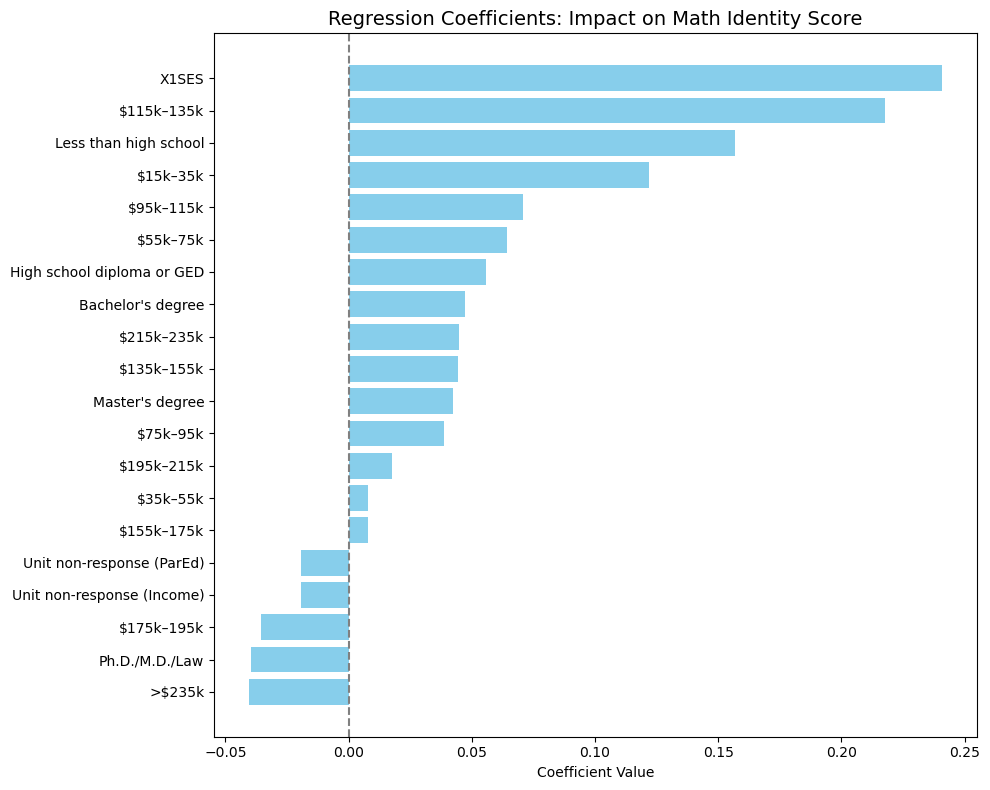

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Coefficients dictionary (from your regression output)
coefficients = {
    "X1SES": 0.2409,
    "Bachelor's degree": 0.0473,
    "High school diploma or GED": 0.0557,
    "Less than high school": 0.1567,
    "Master's degree": 0.0423,
    "Ph.D./M.D./Law": -0.0397,
    "Unit non-response (ParEd)": -0.0194,
    "$15k–35k": 0.1219,
    "$35k–55k": 0.008,
    "$55k–75k": 0.0642,
    "$75k–95k": 0.0389,
    "$95k–115k": 0.0706,
    "$115k–135k": 0.2176,
    "$135k–155k": 0.0444,
    "$155k–175k": 0.0079,
    "$175k–195k": -0.0356,
    "$195k–215k": 0.0176,
    "$215k–235k": 0.0448,
    ">$235k": -0.0405,
    "Unit non-response (Income)": -0.0194,
}

# Convert to DataFrame
df_coef = pd.DataFrame(list(coefficients.items()), columns=["Variable", "Coefficient"])
df_coef = df_coef.sort_values("Coefficient", ascending=True)

# Create and save plot
plt.figure(figsize=(10, 8))
plt.barh(df_coef["Variable"], df_coef["Coefficient"], color="skyblue")
plt.axvline(x=0, color="gray", linestyle="--")
plt.title("Regression Coefficients: Impact on Math Identity Score", fontsize=14)
plt.xlabel("Coefficient Value")
plt.tight_layout()

# Save the figure
plt.savefig("regression_coefficients_plot.png", dpi=300, bbox_inches='tight')
plt.show()
